### MACHINE LEARNING (ML) WORKFLOW

### Project Objective
+ Predict the life expectancy of patients after Thoracic Surgery based on Machine Learning (ML) parameters

### Workflow
1. Data Preparation
2. Data Transformation
3. Exploratory Data Analysis (EDA)
4. Feature selection
5. Build model
6. Save model
7. Interpret model
8. Evaluate model

In [102]:
# Load my EDA Packages
import pandas as pd
import numpy as np

In [103]:
# Load our Data visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
# Load My Dataset
df = pd.read_csv("C:\\Datasets\\ThoracicSurgery.csv")

In [105]:
# Preview the first data point
df.head(10)

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1
5,3,2.48,1.88,1,0,0,0,1,0,1,0,0,0,0,0,51,0
6,3,4.36,3.28,1,0,0,0,1,0,2,1,0,0,1,0,59,1
7,2,3.19,2.50,1,0,0,0,1,0,1,0,0,1,1,0,66,1
8,3,3.16,2.64,2,0,0,0,1,1,1,0,0,0,1,0,68,0
9,3,2.32,2.16,1,0,0,0,1,0,1,0,0,0,1,0,54,0


In [106]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [107]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [108]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [109]:
# Data types
df.dtypes

Diagnosis              int64
FVC                  float64
FEV1                 float64
Performance            int64
Pain                   int64
Haemoptysis            int64
Dyspnoea               int64
Cough                  int64
Weakness               int64
Tumor_Size             int64
Diabetes_Mellitus      int64
MI_6mo                 int64
PAD                    int64
Smoking                int64
Asthma                 int64
Age                    int64
Death_1yr              int64
dtype: object

In [110]:
#How many columns with objects
sum(df.dtypes == 'object')

0

In [111]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [112]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [113]:
target_label = {'Death_1yr'}

In [114]:
# Value count 
df['Death_1yr'].value_counts()

Death_1yr
0    385
1     69
Name: count, dtype: int64

<Axes: xlabel='Death_1yr'>

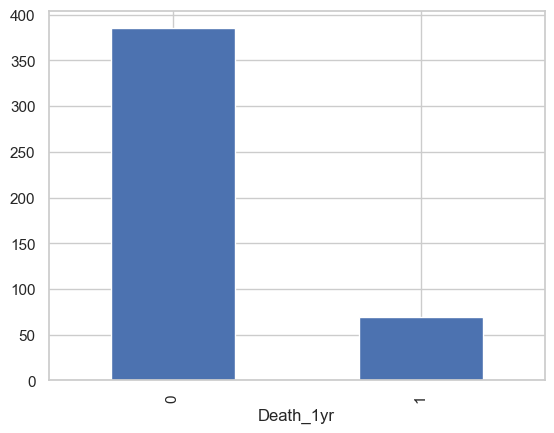

In [115]:
# Plot of value
df['Death_1yr'].value_counts().plot(kind='bar')

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Filter ages based on survival status
ages_died = df[df['Death_1yr'] == 0]['Age']
ages_survived = df[df['Death_1yr'] == 1]['Age']

# Count the number of patients in each category
count_died = ages_died.count()
count_survived = ages_survived.count()

# Total number of patients
total_patients = len(df)

# Split the data into training and testing sets
x = df.drop(columns=['Death_1yr'])
y = df['Death_1yr']

# Split data with 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Number of patients in training and testing sets
train_size = len(x_train)
test_size = len(x_test)

# Count of patients who died and survived in the training set
ages_died_train = y_train[y_train == 0]
ages_survived_train = y_train[y_train == 1]

count_died_train = ages_died_train.count()
count_survived_train = ages_survived_train.count()

# Count of patients who died and survived in the testing set
ages_died_test = y_test[y_test == 0]
ages_survived_test = y_test[y_test == 1]

count_died_test = ages_died_test.count()
count_survived_test = ages_survived_test.count()

# Print the results
print(f"Total number of patients: {total_patients}")
print(f"Number of patients who died after 1 year: {count_died}")
print(f"Number of patients who survived after 1 year: {count_survived}")

print("\nTraining Set:")
print(f"Number of patients in training set: {train_size}")
print(f"Number of patients who died after 1 year in training set: {count_died_train}")
print(f"Number of patients who survived after 1 year in training set: {count_survived_train}")

print("\nTesting Set:")
print(f"Number of patients in testing set: {test_size}")
print(f"Number of patients who died after 1 year in testing set: {count_died_test}")
print(f"Number of patients who survived after 1 year in testing set: {count_survived_test}")


Total number of patients: 454
Number of patients who died after 1 year: 385
Number of patients who survived after 1 year: 69

Training Set:
Number of patients in training set: 317
Number of patients who died after 1 year in training set: 273
Number of patients who survived after 1 year in training set: 44

Testing Set:
Number of patients in testing set: 137
Number of patients who died after 1 year in testing set: 112
Number of patients who survived after 1 year in testing set: 25


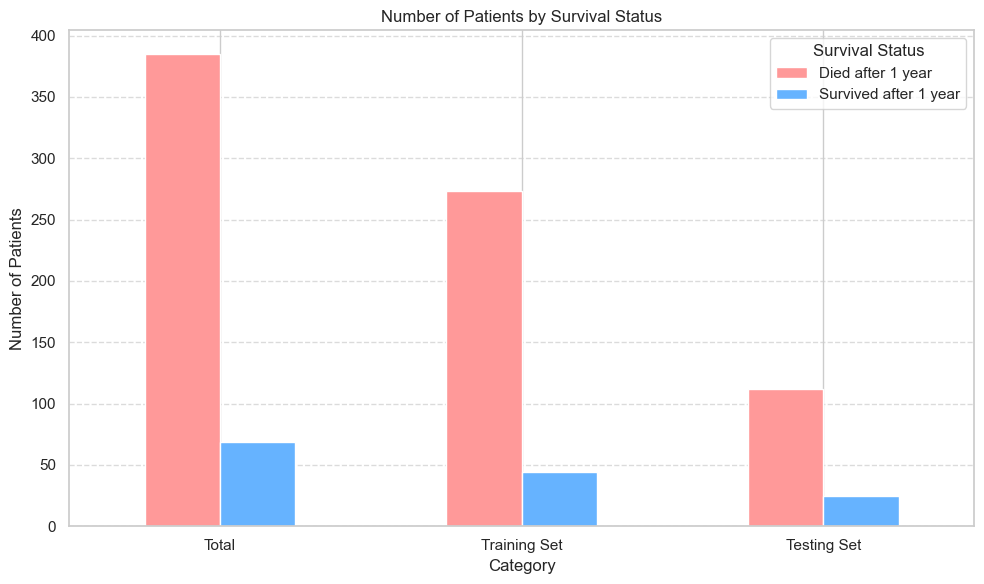

In [117]:
# Prepare data for plotting
data = {
    'Category': ['Total', 'Training Set', 'Testing Set'],
    'Died after 1 year': [count_died, count_died_train, count_died_test],
    'Survived after 1 year': [count_survived, count_survived_train, count_survived_test]
}

df_plot = pd.DataFrame(data)

# Plotting
df_plot.set_index('Category').plot(kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Number of Patients by Survival Status')
plt.ylabel('Number of Patients')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.legend(title='Survival Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

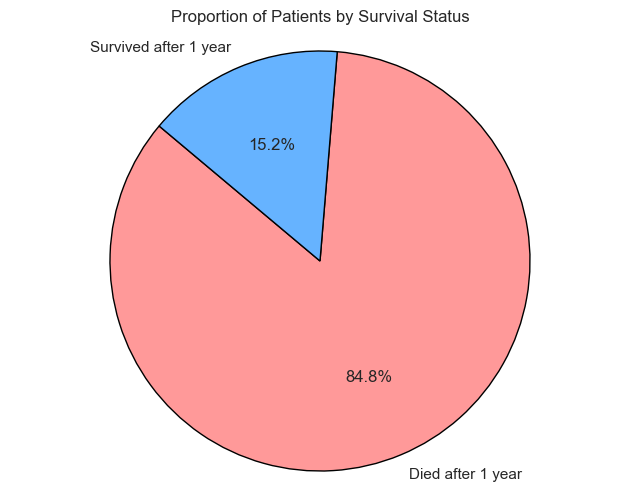

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the counts of patients who died and survived
counts = [count_died, count_survived]
labels = ['Died after 1 year', 'Survived after 1 year']

# Colors for the pie chart
colors = ['#ff9999', '#66b3ff']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Patients by Survival Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


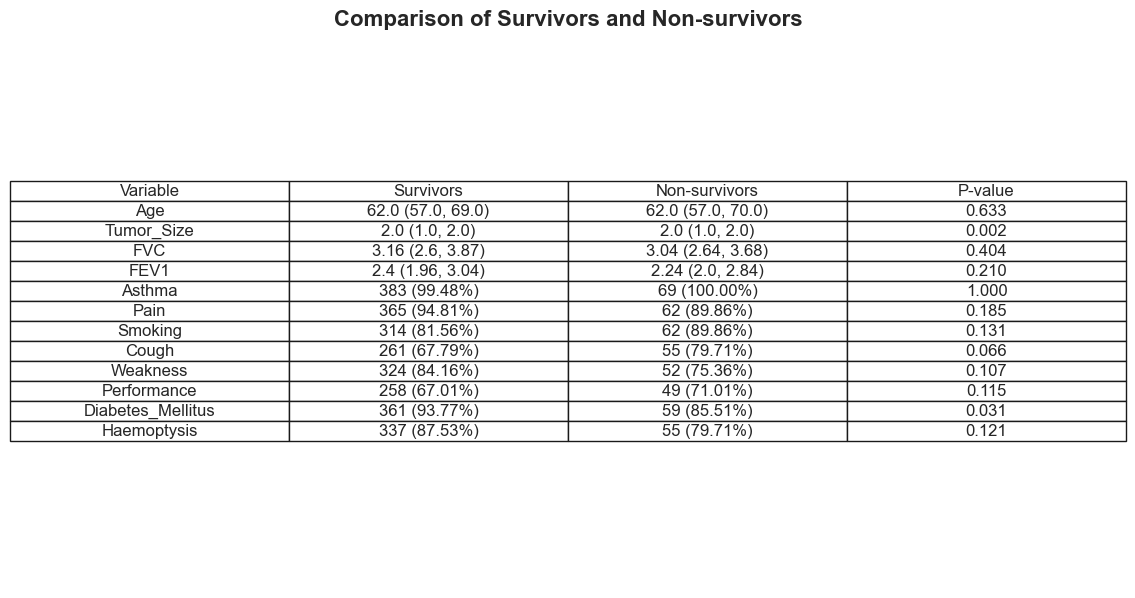

In [119]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, chi2_contingency
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df has a column 'Death_1yr' where 1 = Non-survivor and 0 = Survivor

# Separate the dataframe into survivors and non-survivors
survivors = df[df['Death_1yr'] == 0]
non_survivors = df[df['Death_1yr'] == 1]

# Initialize an empty list to store the results
results = []

# Continuous variables
continuous_vars = ['Age', 'Tumor_Size', 'FVC', 'FEV1']

for var in continuous_vars:
    med_survivors = np.median(survivors[var])
    iqr_survivors = np.percentile(survivors[var], [25, 75])
    
    med_non_survivors = np.median(non_survivors[var])
    iqr_non_survivors = np.percentile(non_survivors[var], [25, 75])
    
    # Mann-Whitney U Test for non-parametric data
    p_value = mannwhitneyu(survivors[var], non_survivors[var])[1]
    
    results.append([var,
                    f"{med_survivors} ({iqr_survivors[0]}, {iqr_survivors[1]})",
                    f"{med_non_survivors} ({iqr_non_survivors[0]}, {iqr_non_survivors[1]})",
                    f"{p_value:.3f}"])

# Categorical variables
categorical_vars = ['Asthma', 'Pain', 'Smoking', 'Cough', 'Weakness', 'Performance', 'Diabetes_Mellitus', 'Haemoptysis']

for var in categorical_vars:
    count_survivors = survivors[var].value_counts()
    count_non_survivors = non_survivors[var].value_counts()
    
    # Chi-square test for categorical data
    contingency_table = pd.crosstab(df['Death_1yr'], df[var])
    p_value = chi2_contingency(contingency_table)[1]
    
    results.append([var,
                    f"{count_survivors.iloc[0]} ({(count_survivors.iloc[0]/len(survivors))*100:.2f}%)",
                    f"{count_non_survivors.iloc[0]} ({(count_non_survivors.iloc[0]/len(non_survivors))*100:.2f}%)",
                    f"{p_value:.3f}"])

# Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=["Variable", "Survivors", "Non-survivors", "P-value"])

# Plot the table using seaborn and matplotlib
plt.figure(figsize=(12, len(results_df)*0.6))
sns.set(style="whitegrid")

# Create a table plot
table_plot = plt.table(cellText=results_df.values,
                       colLabels=results_df.columns,
                       cellLoc='center', 
                       loc='center')

table_plot.auto_set_font_size(False)
table_plot.set_fontsize(12)
table_plot.scale(1.2, 1.2)

# Remove axes and add title
plt.axis('off')
plt.title('Comparison of Survivors and Non-survivors', fontsize=16, weight='bold')

# Save the table as a PNG image
plt.savefig("survivor_comparison_table.png", bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


### Survival Curves
Kaplan-Meier Curves: Useful for visualizing the survival probability over time for different groups (e.g., patients who died vs. survived). This is particularly useful if you have time-to-event data.

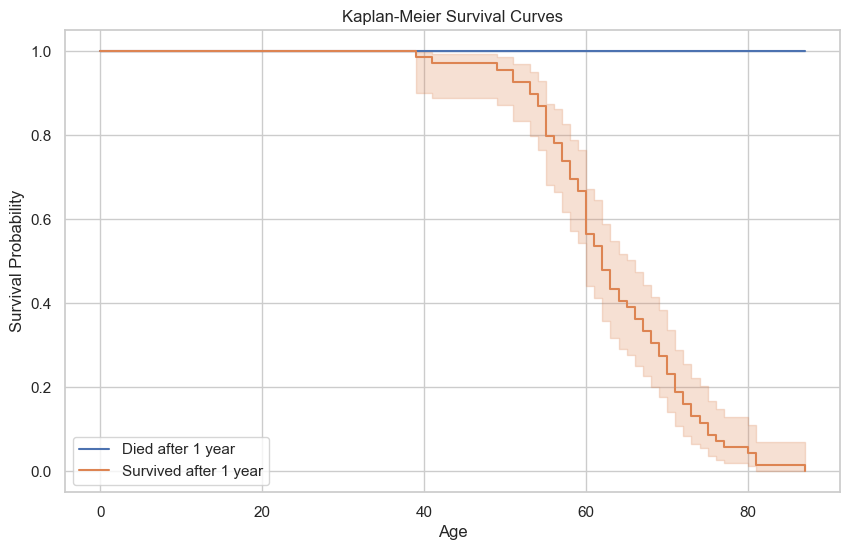

In [120]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Kaplan-Meier estimate for patients who died
kmf.fit(durations=df[df['Death_1yr'] == 0]['Age'], event_observed=df[df['Death_1yr'] == 0]['Death_1yr'])
kmf.plot(label='Died after 1 year')

# Kaplan-Meier estimate for patients who survived
kmf.fit(durations=df[df['Death_1yr'] == 1]['Age'], event_observed=df[df['Death_1yr'] == 1]['Death_1yr'])
kmf.plot(label='Survived after 1 year')

plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


### Box Plots
Distribution of Features by Survival Status: Use box plots to compare the distribution of continuous features by survival status.

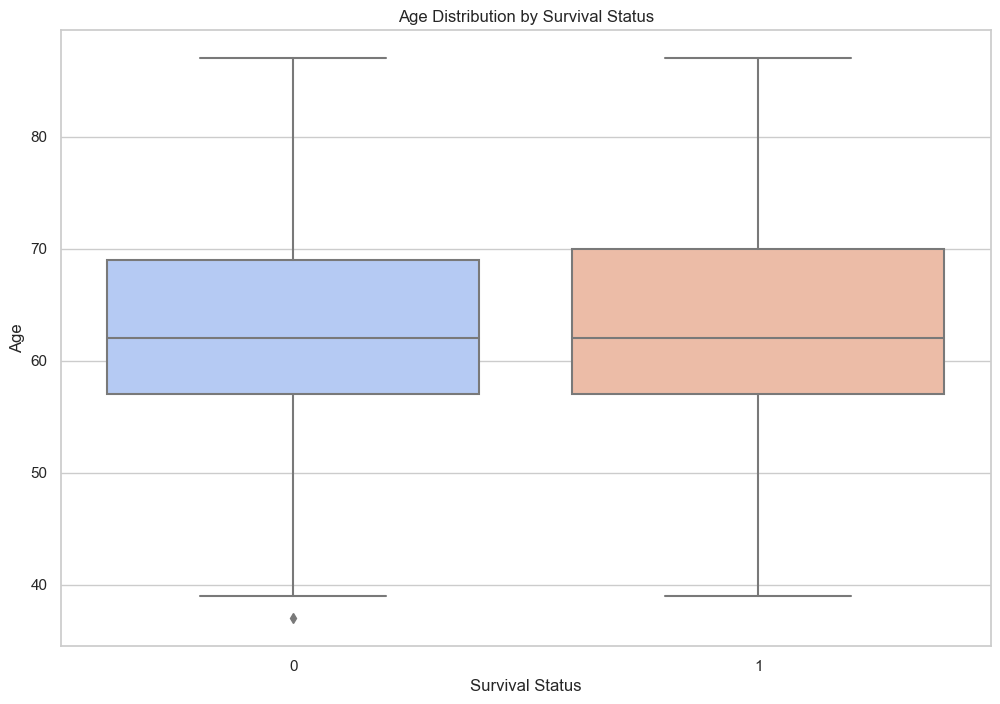

In [121]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Death_1yr', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.show()


c:\Users\HP\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


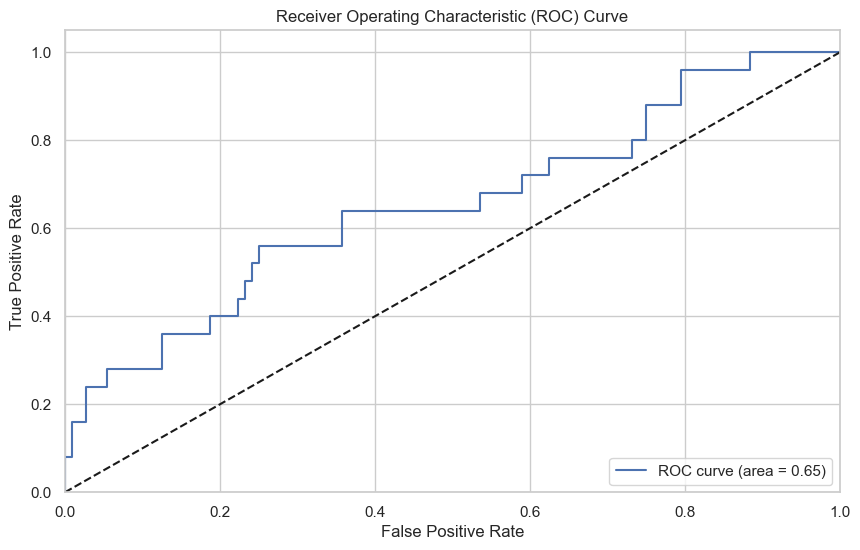

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming model is one that supports predict_proba, e.g., LogisticRegression or RandomForestClassifier
# Example for Logistic Regression
model = LogisticRegression()  # Replace with your actual model
model.fit(x_train, y_train)   # Ensure the model is trained

# Get probabilities for ROC curve
y_score = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [123]:
# Assuming your model is already trained and supports decision_function
# y_test: The true labels for the test data
# x_test: The test data features

# Get decision scores using decision_function
y_scores = model.decision_function(x_test)

# Example decision curve analysis function (to be implemented)
def decision_curve_analysis(y_true, y_score):
    # Implement your decision curve analysis logic here
    pass

# Perform decision curve analysis
decision_curve_analysis(y_test, y_scores)


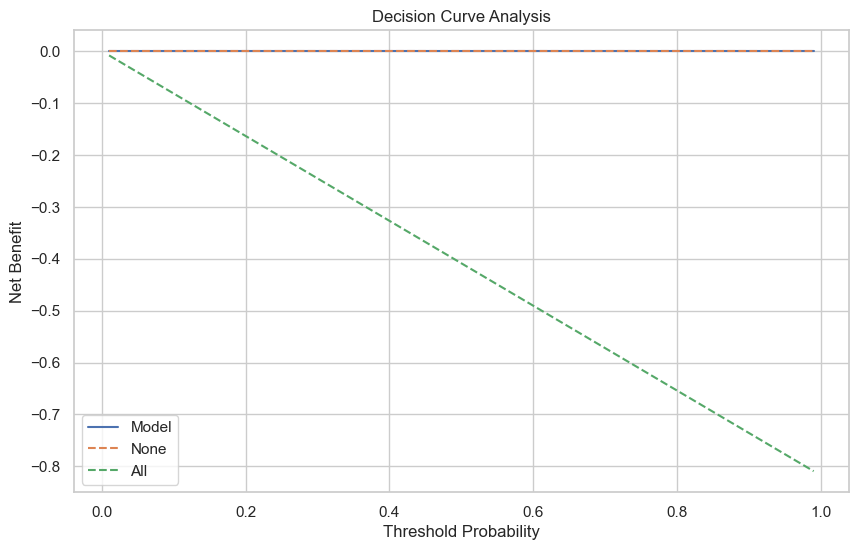

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def decision_curve_analysis(y_true, y_score, thresholds=np.linspace(0.01, 0.99, 100)):
    """
    Perform decision curve analysis.

    Parameters:
    - y_true: Array of true binary labels
    - y_score: Array of decision scores or predicted probabilities
    - thresholds: Array of threshold probabilities to evaluate
    
    Returns:
    - net_benefit: Net benefit at each threshold
    - thresholds: The corresponding threshold probabilities
    """

    # Initialize arrays to hold results
    net_benefit = []
    
    for threshold in thresholds:
        # Convert scores to binary predictions based on the threshold
        predicted_positives = y_score >= threshold
        
        # Calculate True Positives (TP) and False Positives (FP)
        TP = np.sum((predicted_positives == 1) & (y_true == 1))
        FP = np.sum((predicted_positives == 1) & (y_true == 0))
        
        # Calculate the proportion of true positives and false positives
        prop_TP = TP / len(y_true)
        prop_FP = FP / len(y_true)
        
        # Calculate the net benefit
        nb = prop_TP - (prop_FP * (threshold / (1 - threshold)))
        net_benefit.append(nb)

    return np.array(net_benefit), thresholds

# Perform decision curve analysis
net_benefit, thresholds = decision_curve_analysis(y_test, y_scores)

# Plot the decision curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, net_benefit, label='Model')
plt.plot(thresholds, thresholds - thresholds, label='None', linestyle='--')
plt.plot(thresholds, thresholds * (np.sum(y_test) / len(y_test)) - thresholds, label='All', linestyle='--')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis')
plt.legend()
plt.show()


### Reducing Bias from the Dataset

In [125]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [126]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [127]:
cols = ['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(df.drop(['Death_1yr'],axis = 1)), columns = cols)
Y = df['Death_1yr']

In [128]:
up_sampling = RandomOverSampler()
X_train_up_sampling, Y_train_up_sampling = up_sampling.fit_resample(x_train, y_train)

In [129]:
xfeatures =  df[['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']]

ylabels = df[['Death_1yr']]

<Axes: xlabel='Death_1yr'>

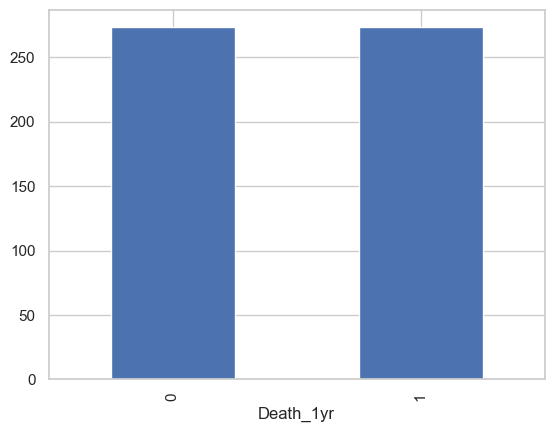

In [130]:
Y_train_up_sampling.value_counts().plot.bar()

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Narrative

+ The Dataset is now balanced and bias eliminated

### Frequency distribution table using the Age Range

In [132]:
df['Age'].max()

87

In [133]:
df['Age'].min()

37

In [134]:
labels = ["Less than 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['Age'], bins=bins, labels=labels)).size()

C:\Users\HP\AppData\Local\Temp\ipykernel_4048\1175128417.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_df = df.groupby(pd.cut(df['Age'], bins=bins, labels=labels)).size()


In [135]:
freq_df

Age
Less than 10      0
10-20             0
20-30             0
30-40             4
40-50            18
50-60           170
60-70           169
70 and more      88
dtype: int64

<Axes: xlabel='Age'>

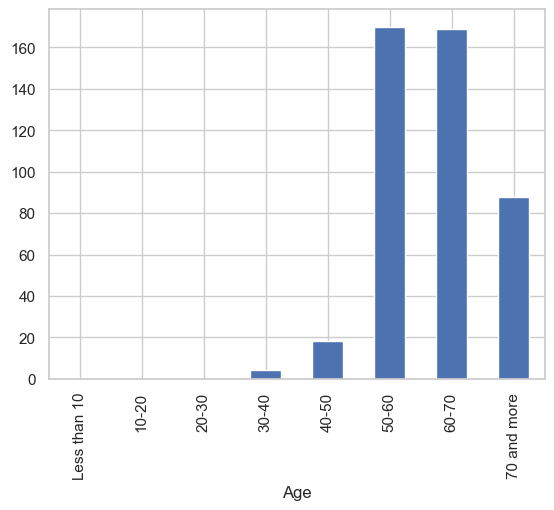

In [136]:
freq_df.plot(kind="bar")

### Narrative 1
+ Highest prevalence of Hepatitis is from 30 - 40 years
+ The least is individual under 10 years, and elderly above 70 years

### Checking for outliers
+ Univariate Analysis
+ Multivariate Analysis

### Methods
+ Boxplot (Uni)
+ Scatterplot (Multi)
+ Z-score
+ IQR (Interquantile Range)

<Axes: >

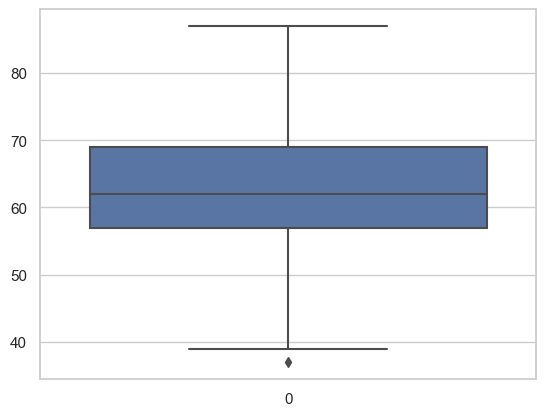

In [137]:
### Using Box-plot for outliers detection
import seaborn as sns
sns.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Haemoptysis'>

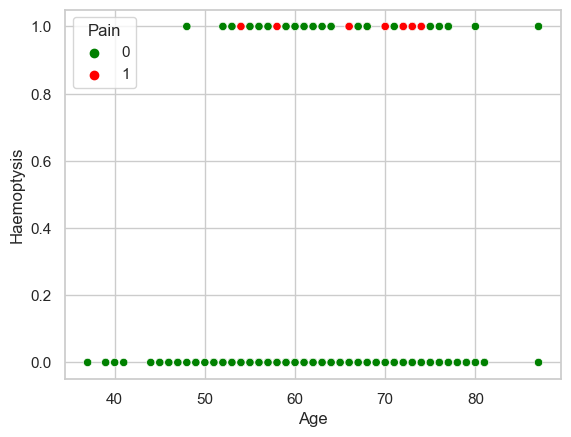

In [138]:
# Scatter Plot
sns.scatterplot(x=df['Age'], y=df['Haemoptysis'], hue=df['Pain'], palette=['green', 'red'], data=df)

### Using Interquartile Range
+ H-Spread/Mid_Spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [139]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [140]:
IQR = q1 - q3

In [141]:
IQR

Diagnosis             0.0000
FVC                  -1.2400
FEV1                 -1.0175
Performance          -1.0000
Pain                  0.0000
Haemoptysis           0.0000
Dyspnoea              0.0000
Cough                -1.0000
Weakness              0.0000
Tumor_Size           -1.0000
Diabetes_Mellitus     0.0000
MI_6mo                0.0000
PAD                   0.0000
Smoking               0.0000
Asthma                0.0000
Age                 -12.0000
Death_1yr             0.0000
dtype: float64

In [142]:
### Get the actual data point that is an outlier
(df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,True,True,True,True,False,False,False,True,True,True,False,False,False,False,False,True,False
1,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
2,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
3,False,True,True,True,False,False,False,True,False,True,False,False,False,True,False,True,False
4,False,True,True,True,False,True,False,True,True,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,True,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
450,False,True,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
451,False,True,True,True,False,False,False,True,False,True,False,False,False,True,False,True,False
452,False,True,True,True,False,False,False,True,True,True,False,False,False,False,False,True,False


### Narative 
+ The data points with True are the Outliers


#### Solution
+ Remove
+ Change
+ Ignore

In [143]:
#Removing all outliers
df_no_outlier = df[-((df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [144]:
df_no_outlier

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr


In [145]:
print(df.shape)

(454, 17)


In [146]:
print(df_no_outlier.shape)

(0, 17)


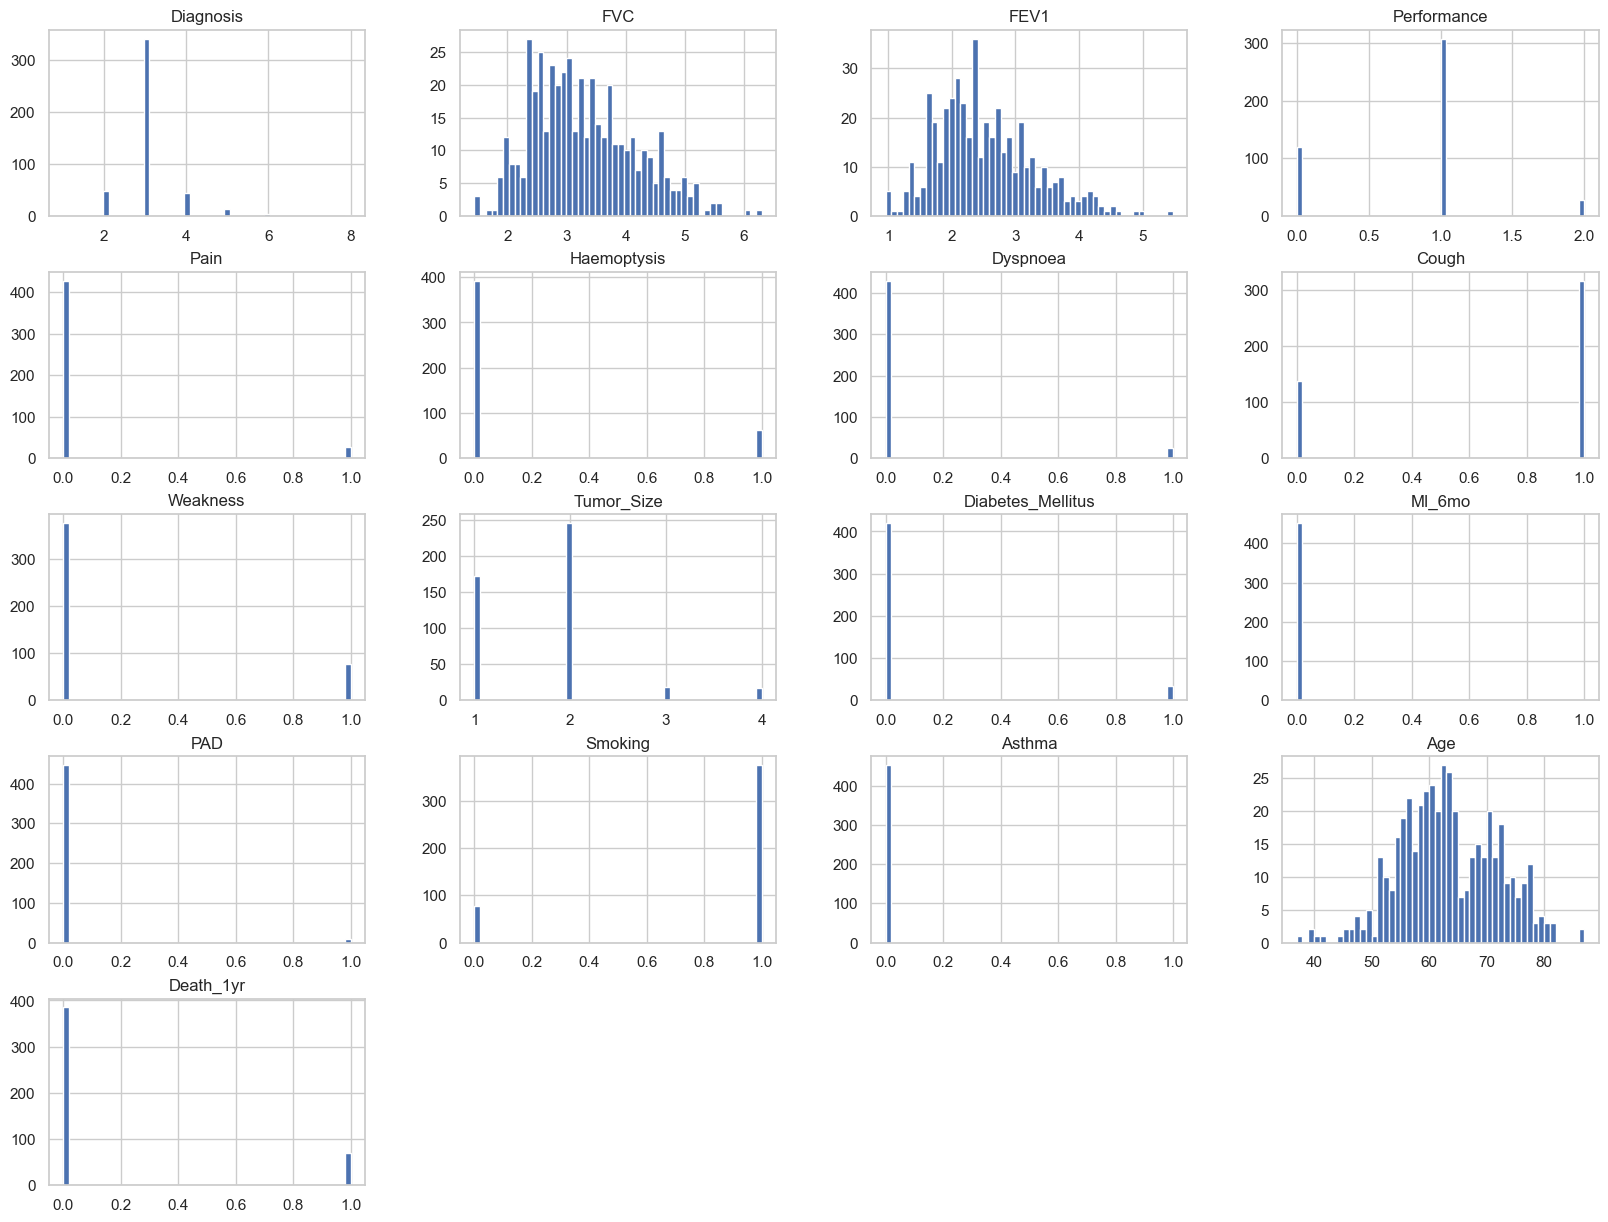

In [147]:
### Plot of distribution of data
df.hist(bins=50, figsize=(20,15))
plt.show()

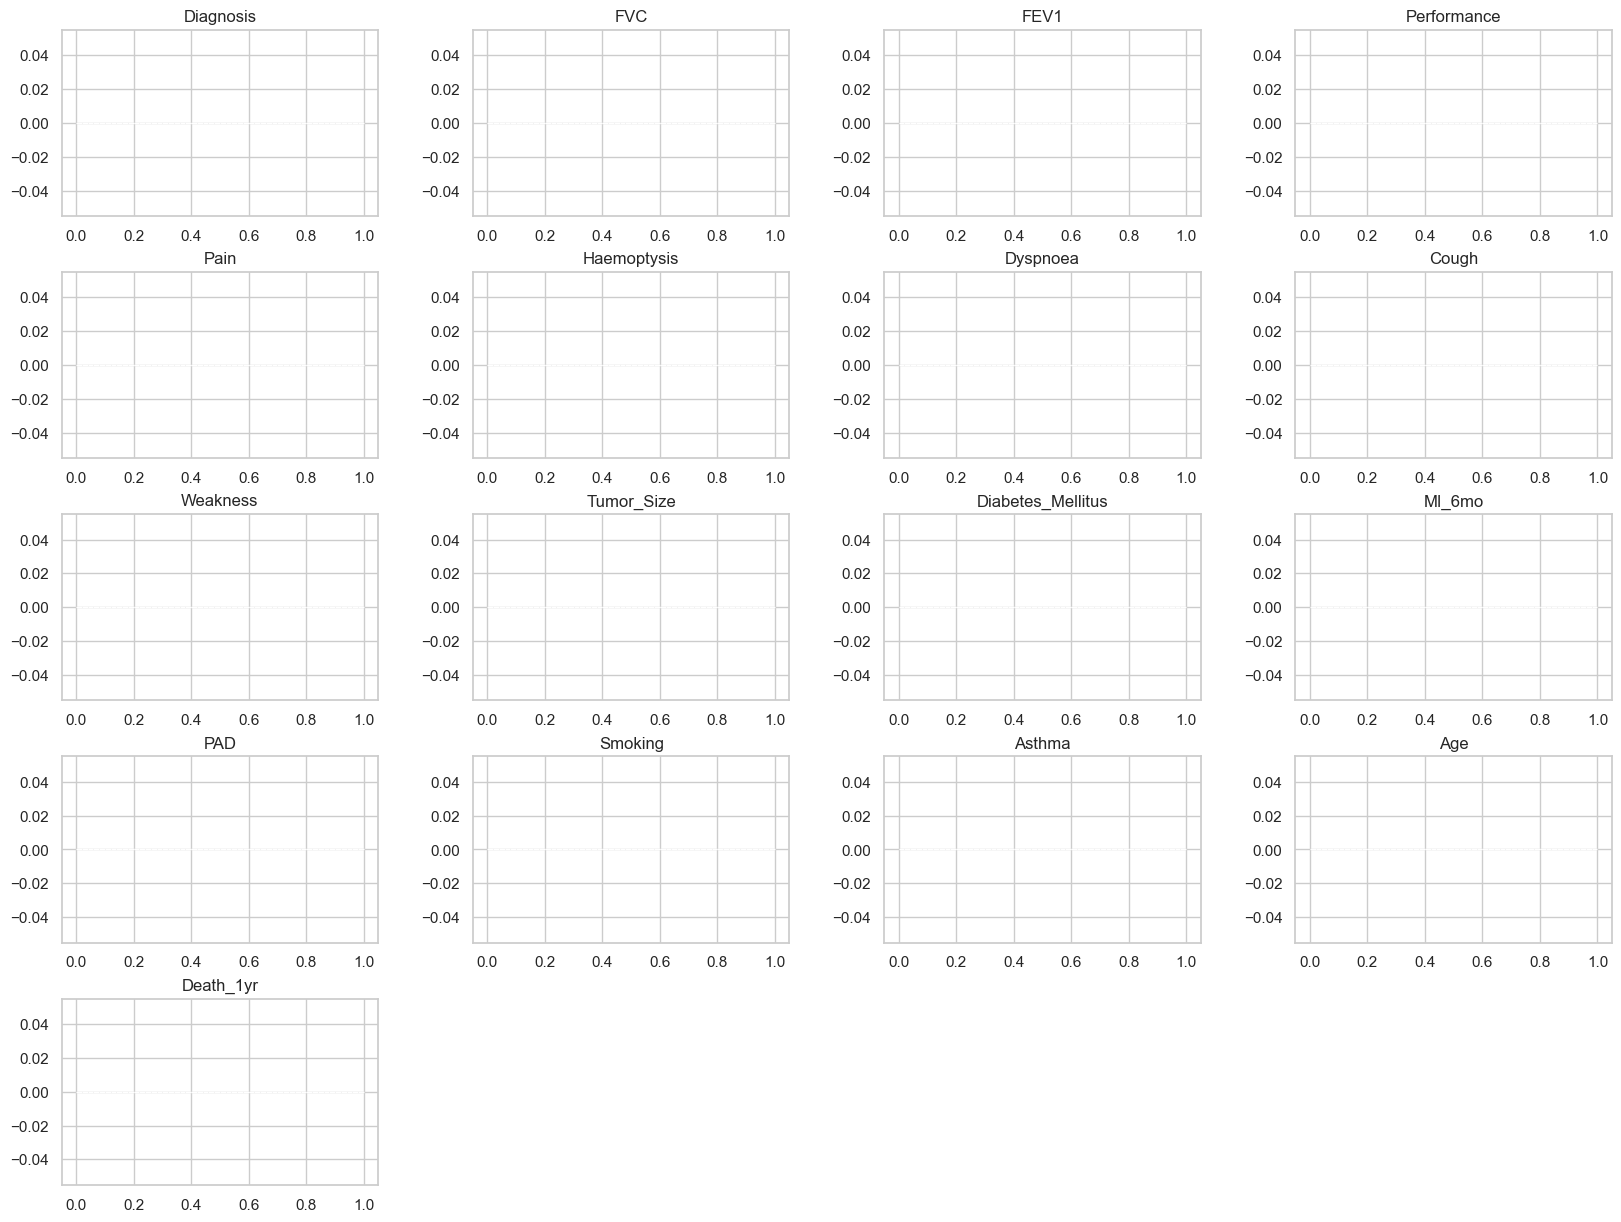

In [148]:
### Plot of distribution of data
df_no_outlier.hist(bins=50, figsize=(20,15))
plt.show()

### Feature Selection and Importance
+ SelectKbest
  - Strong relationship with the output/target

+ Recursive Feature Elimination

In [149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [150]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [151]:
xfeatures = df[['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']] 

ylabels = df['Death_1yr']

In [152]:
# Using Skbest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [153]:
# Highest score shows the best fit
print("Scores", best_feature_fit.scores_)

Scores [0.41031818 0.21347872 0.5775659  1.42213752 2.41089292 2.62173974
 5.47585018 1.19405661 2.63354809 3.70660964 5.32947598 0.35844156
 0.59634858 0.48632379 0.35844156 0.40038474]


In [154]:
# Mapping to feature name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [155]:
feature_scores

,Feature_Scores
0,0.410318
1,0.213479
2,0.577566
3,1.422138
4,2.410893
5,2.621740
6,5.475850
7,1.194057
8,2.633548
9,3.706610


In [156]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis=1)

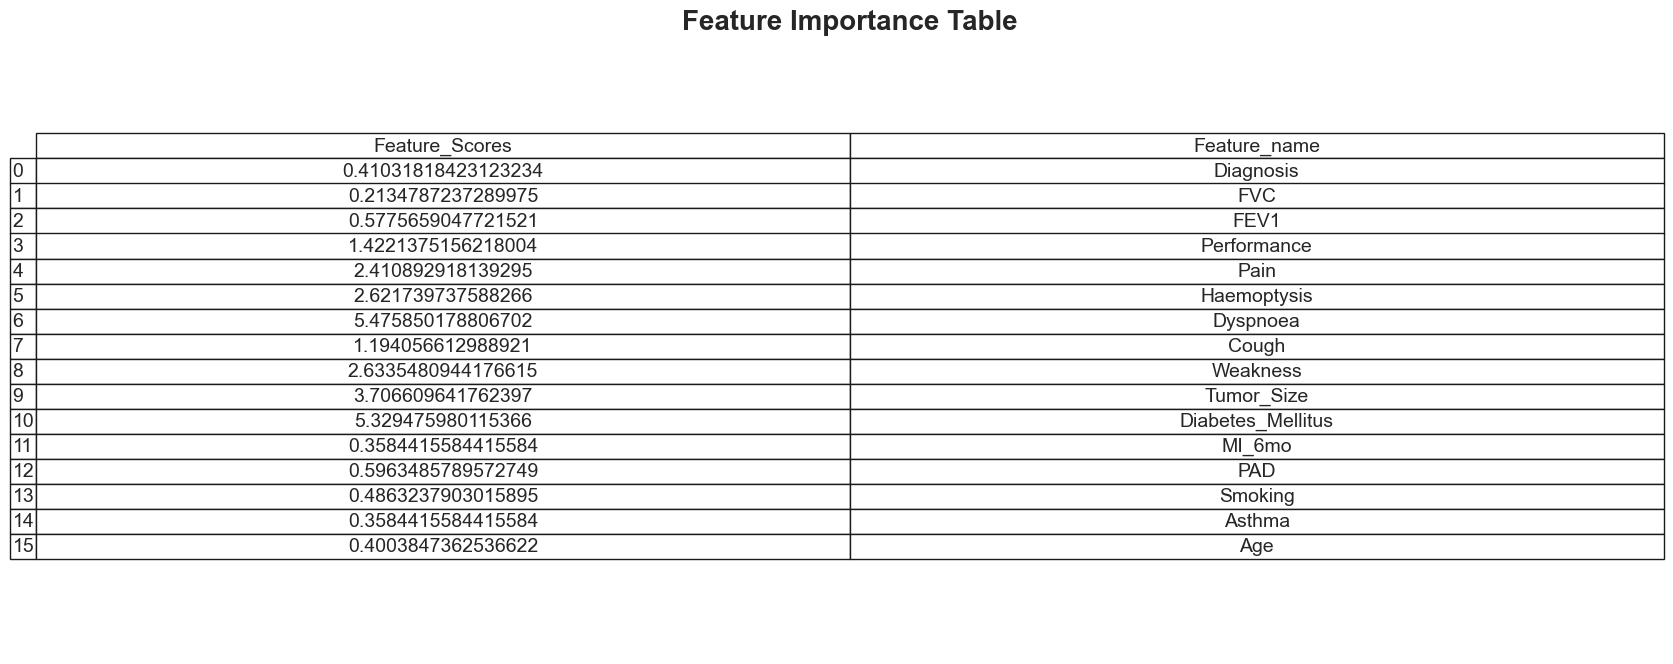

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)
# best_feat_df = pd.DataFrame({
#     'Feature': ['Feature1', 'Feature2', 'Feature3'],
#     'Importance': [0.45, 0.30, 0.25]
# })

# Replace the example DataFrame with your actual `best_feat_df`
# best_feat_df = your DataFrame with features

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))  # Increase figure size for better visibility

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=best_feat_df.values,
                 colLabels=best_feat_df.columns,
                 cellLoc='center',
                 loc='center',
                 rowLabels=best_feat_df.index)

# Scale the table
table.auto_set_font_size(False)
table.set_fontsize(14)  # Increase font size for better readability
table.scale(1.5, 1.5)   # Scale up for better readability

# Add a title
plt.title('Feature Importance Table', fontsize=20, weight='bold')

# Save the figure
plt.savefig("feature_importance_table.png", bbox_inches='tight', dpi=300)

# Display the plot (optional)
plt.show()


In [158]:
# Get the best feature
# The higher the number the more important the feature
best_feat_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_name
6,5.475850,Dyspnoea
10,5.329476,Diabetes_Mellitus
9,3.706610,Tumor_Size
8,2.633548,Weakness
5,2.621740,Haemoptysis
4,2.410893,Pain
3,1.422138,Performance
7,1.194057,Cough
12,0.596349,PAD
2,0.577566,FEV1


In [159]:
best_feat_df.nlargest(10, 'Feature_Scores') ['Feature_name'].unique

<bound method Series.unique of 6              Dyspnoea
10    Diabetes_Mellitus
9            Tumor_Size
8              Weakness
5           Haemoptysis
4                  Pain
3           Performance
7                 Cough
12                  PAD
2                  FEV1
Name: Feature_name, dtype: object>

#### Recursive Feature Elimination

In [160]:
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [161]:
logit = LogisticRegression()

In [162]:
rfe = RFE(estimator=logit, n_features_to_select=8)

In [163]:
rfe_fit = rfe.fit(xfeatures, ylabels)

In [164]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_, columns=['Selected Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['Ranking Features'])

In [165]:
rfe_feature_df = pd.concat([feature_column_names, selected_features, ranking_features], axis=1)

In [237]:
rfe_feature_df

,Feature_name,Selected Features,Ranking Features
0,Diagnosis,True,1
1,FVC,False,7
2,FEV1,False,4
3,Performance,False,8
4,Pain,True,1
5,Haemoptysis,True,1
6,Dyspnoea,True,1
7,Cough,False,2
8,Weakness,True,1
9,Tumor_Size,True,1


### Narrative
+ RFE we will eliminate the lowest rating or true

### Checking for feature importance
+ ExtraTreeClassifier
+ Which feature is important

In [167]:
from sklearn.ensemble import ExtraTreesClassifier

In [168]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [169]:
# Print Importance
print(et_clf.feature_importances_)

[0.09928195 0.18449915 0.20381124 0.04651479 0.02517534 0.03302433
 0.0257906  0.02405789 0.03670949 0.0887888  0.02703389 0.00046619
 0.01077589 0.02549665 0.00050289 0.16807092]


In [170]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeatures.columns)

In [171]:
feature_importance_df

Diagnosis            0.099282
FVC                  0.184499
FEV1                 0.203811
Performance          0.046515
Pain                 0.025175
Haemoptysis          0.033024
Dyspnoea             0.025791
Cough                0.024058
Weakness             0.036709
Tumor_Size           0.088789
Diabetes_Mellitus    0.027034
MI_6mo               0.000466
PAD                  0.010776
Smoking              0.025497
Asthma               0.000503
Age                  0.168071
dtype: float64

<Axes: >

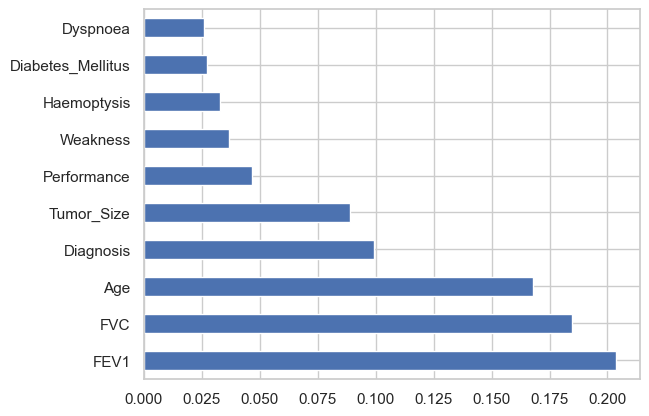

In [172]:
feature_importance_df.nlargest(10).plot(kind='barh')

### Narrative 
+ All the methods (SelectKBest, RFE & ExtCLF ) gave me almost thesame features to use

### Checking for correlation
+ Heat Map for correlation

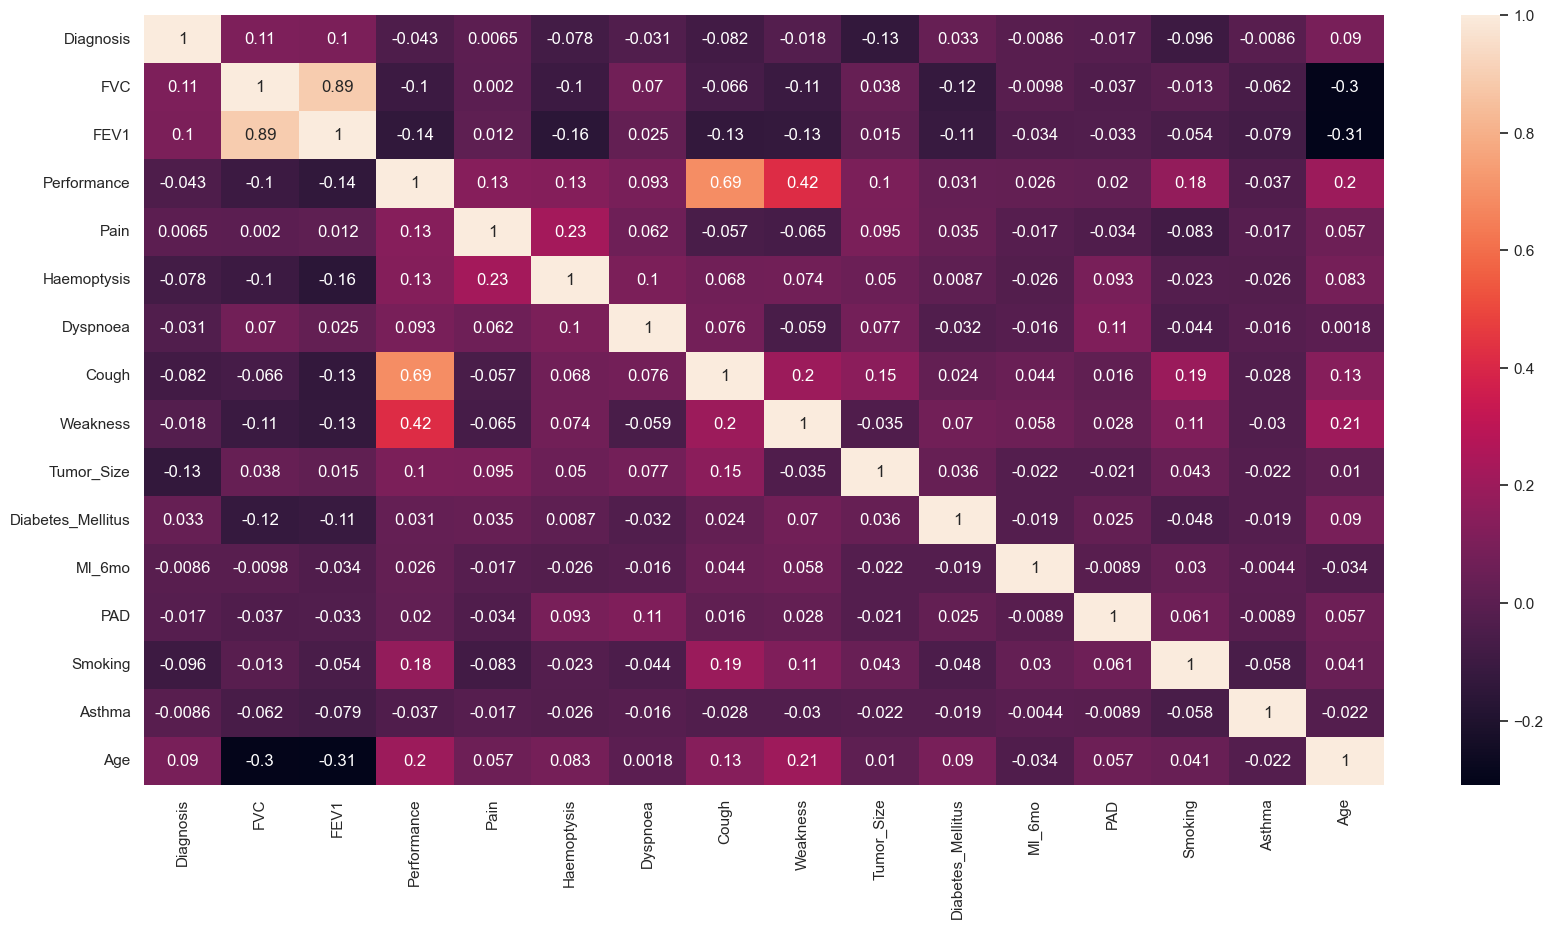

In [173]:
plt.figure(figsize=(20, 10))
sns.heatmap(xfeatures.corr(), annot=True)
plt.show()

### Model Building 
+ Features & labels
+ Data Train/Test/Split
+ Algorithm Comparisms
+ Logistic Regression
+ K-Nearest Neighbour
+ Decision Tree Classifier
+ Support Vector Machine
+ Linear Discriminant Analysis
+ Serialize (Save Model)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [175]:
xfeatures

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63
450,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61
451,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52
452,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79


In [176]:
ylabels

0      0
1      0
2      0
3      0
4      1
      ..
449    0
450    0
451    0
452    0
453    0
Name: Death_1yr, Length: 454, dtype: int64

In [177]:
#Selected Features
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [178]:
  xfeatures_best =  df[['Age', 'Asthma', 'Pain', 'Smoking', 'Cough',
        'Weakness', 'Performance', 'Diabetes_Mellitus',
       'Haemoptysis', 'Tumor_Size', 'FVC', 'FEV1' ]]

In [179]:
# Train/Test Dataset for best features
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size=0.30, random_state=7)

In [180]:
# Comparing ML Algorithms
# Spot Checking ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

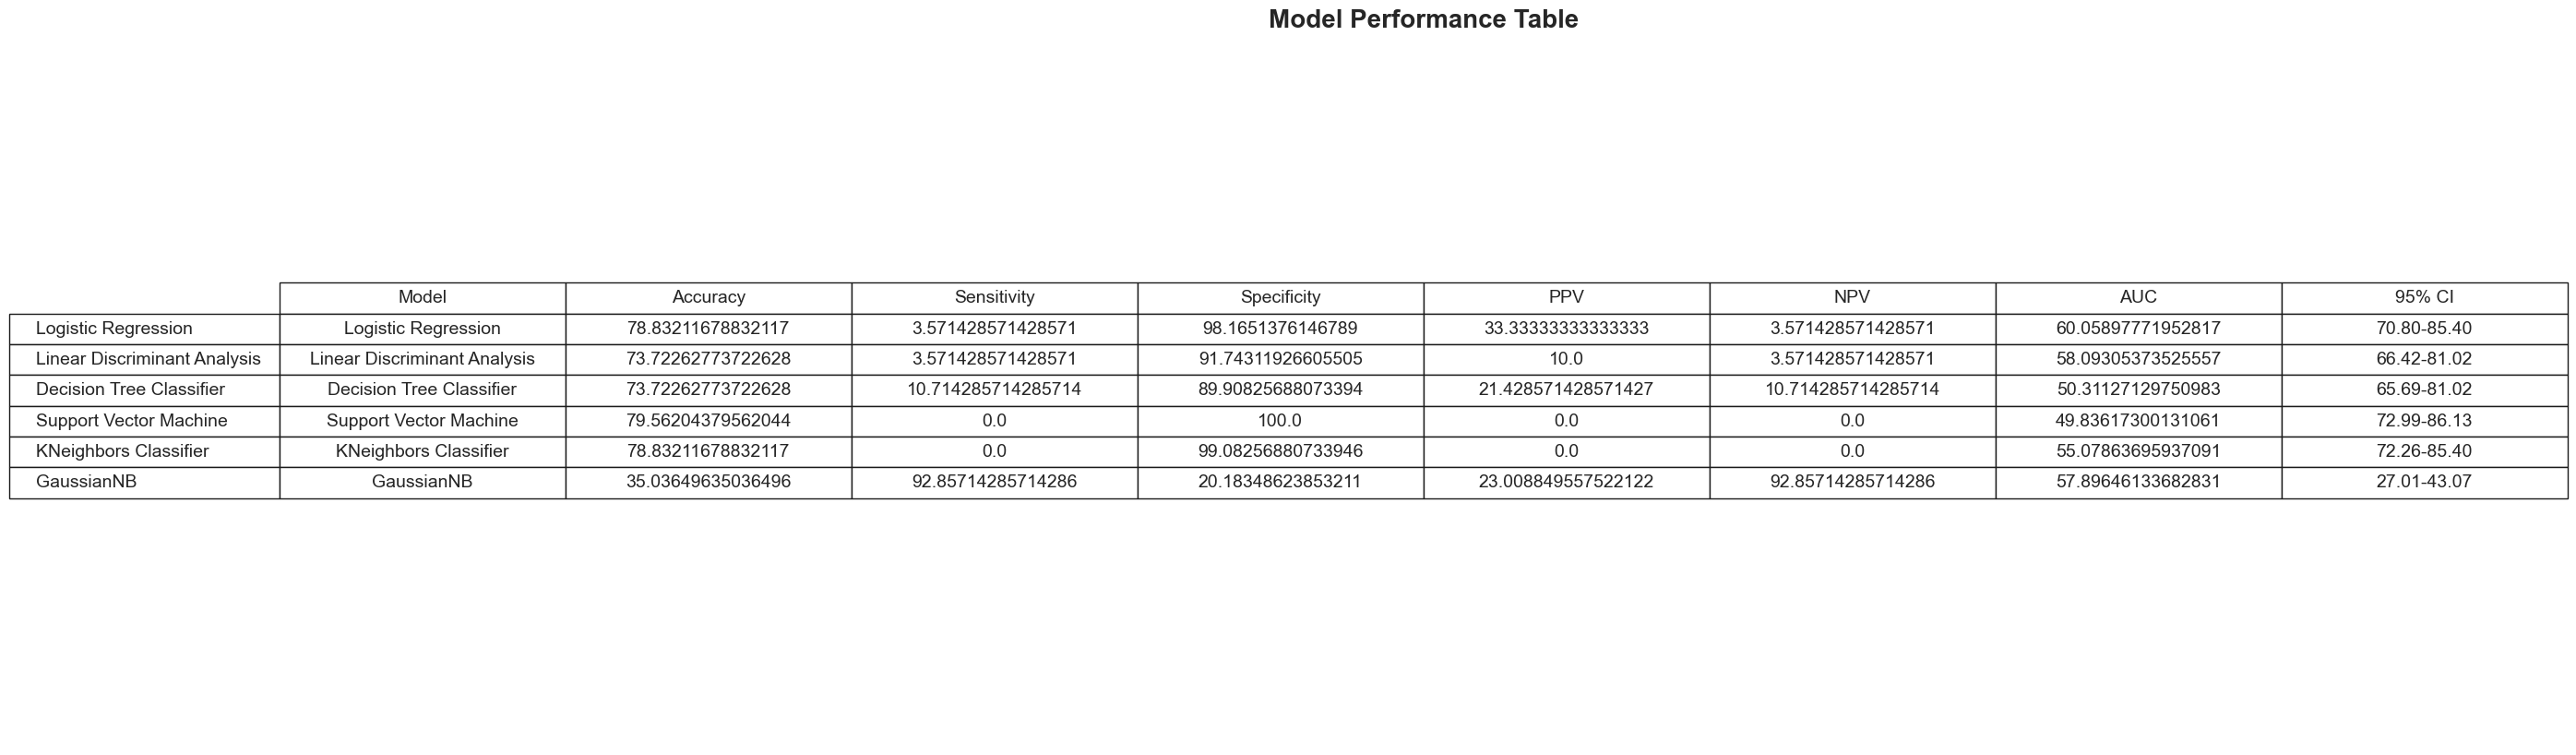

In [235]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  # Enable probability for AUC
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB())
]

# Initialize lists to store results
model_results = []

# Evaluate each model
for name, model in models:
    model.fit(x_train_b, y_train_b)  # Fit model on training data
    y_pred = model.predict(x_test_b)  # Predict on test data
    y_proba = model.predict_proba(x_test_b)[:, 1]  # Probability estimates for AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_b, y_pred) * 100
    sensitivity = recall_score(y_test_b, y_pred) * 100
    specificity = (confusion_matrix(y_test_b, y_pred)[0, 0] / 
                   (confusion_matrix(y_test_b, y_pred)[0, 0] + confusion_matrix(y_test_b, y_pred)[0, 1])) * 100
    ppv = precision_score(y_test_b, y_pred) * 100
    npv = (confusion_matrix(y_test_b, y_pred)[1, 1] / 
           (confusion_matrix(y_test_b, y_pred)[1, 1] + confusion_matrix(y_test_b, y_pred)[1, 0])) * 100
    auc = roc_auc_score(y_test_b, y_proba) * 100
    
    # Calculate 95% Confidence Interval for Accuracy
    bootstrapped_accuracies = []
    for i in range(1000):
        X_resampled, y_resampled = resample(x_test_b, y_test_b)
        bootstrapped_accuracies.append(accuracy_score(y_resampled, model.predict(X_resampled)) * 100)
    ci_lower = np.percentile(bootstrapped_accuracies, 2.5)
    ci_upper = np.percentile(bootstrapped_accuracies, 97.5)
    ci = f"{ci_lower:.2f}-{ci_upper:.2f}"
    
    # Store results
    model_results.append([name, accuracy, sensitivity, specificity, ppv, npv, auc, ci])

# Convert results to a DataFrame
results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 
                                                  'PPV', 'NPV', 'AUC', '95% CI'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 10))  # Increase figure size for better visibility

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 cellLoc='center',
                 loc='center',
                 rowLabels=results_df['Model'])

# Scale the table
table.auto_set_font_size(False)
table.set_fontsize(14)  # Increase font size for better readability
table.scale(2.0, 2.0)   # Scale up for better readability

# Add a title
plt.title('Model Performance Table', fontsize=20, weight='bold')

# Save the figure
plt.savefig("model_performance_table.png", bbox_inches='tight', dpi=300)

# Display the plot (optional)
plt.show()


### Area Under the Curve Plot for each of the Model

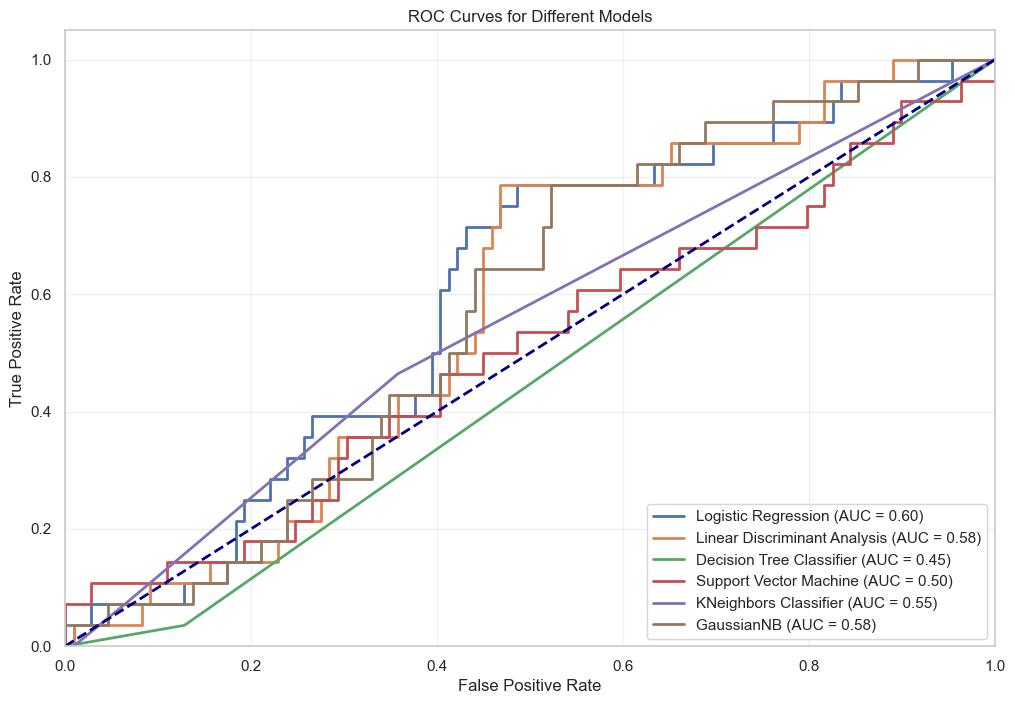

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each model and plot the ROC curve
for name, model in models:
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(x_test_b)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_b, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


### Calibration Plot for each of the Model

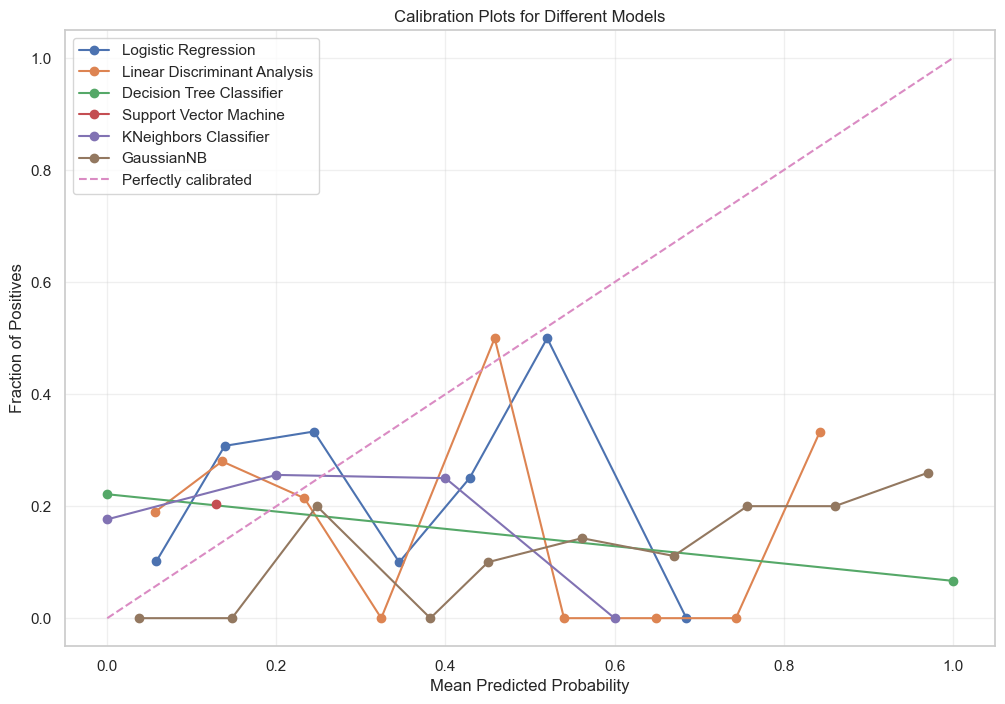

In [190]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each model and plot the calibration curve
for name, model in models:
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(x_test_b)[:, 1]
    
    # Calculate the calibration curve
    prob_true, prob_pred = calibration_curve(y_test_b, y_proba, n_bins=10, strategy='uniform')
    
    # Plot the calibration curve
    plt.plot(prob_pred, prob_true, marker='o', label='%s' % (name))

# Plot the perfectly calibrated line
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

# Plot settings
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plots for Different Models')
plt.legend(loc="upper left")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


### Decision Curve for each of the model

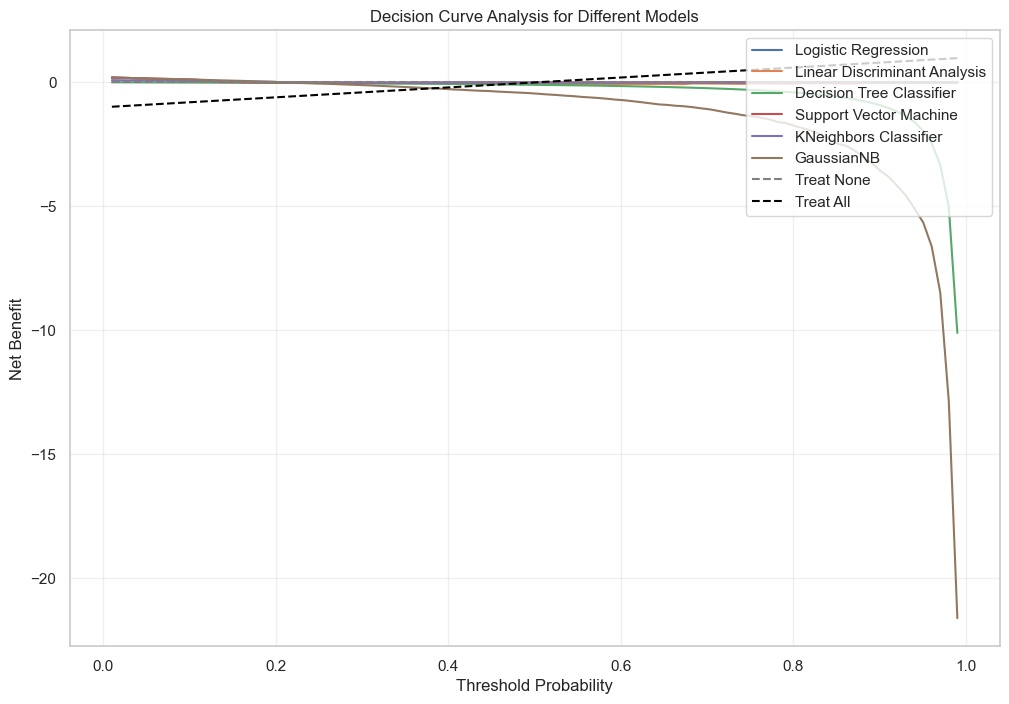

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate net benefit
def net_benefit(y_true, y_prob, threshold):
    tp = np.sum((y_prob >= threshold) & (y_true == 1))
    fp = np.sum((y_prob >= threshold) & (y_true == 0))
    tn = np.sum((y_prob < threshold) & (y_true == 0))
    fn = np.sum((y_prob < threshold) & (y_true == 1))
    
    n = len(y_true)
    nb = (tp - fp * (threshold / (1 - threshold))) / n
    return nb

# Define thresholds to evaluate
thresholds = np.linspace(0.01, 0.99, 100)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each model and plot the decision curve
for name, model in models:
    y_proba = model.predict_proba(x_test_b)[:, 1]
    net_benefits = [net_benefit(y_test_b, y_proba, t) for t in thresholds]
    
    # Plot the decision curve
    plt.plot(thresholds, net_benefits, label='%s' % (name))

# Add the "Treat All" and "Treat None" strategies
plt.plot(thresholds, [0] * len(thresholds), linestyle='--', color='grey', label='Treat None')
plt.plot(thresholds, thresholds - (1 - thresholds), linestyle='--', color='black', label='Treat All')

# Plot settings
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis for Different Models')
plt.legend(loc="upper right")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


### ROC (Receiver Operating Characteristic) of 1 year mortality model

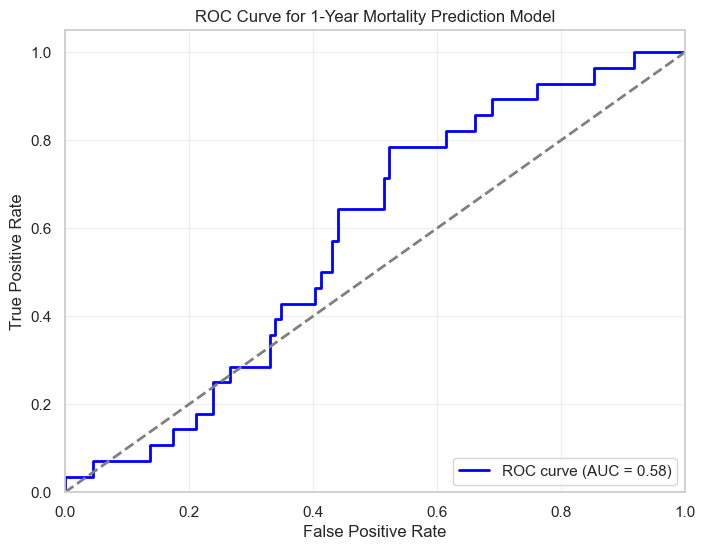

In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained a model, e.g., Logistic Regression
# model = LogisticRegression().fit(x_train_b, y_train_b)

# Predict the probability of the positive class (1-year survival)
y_proba = model.predict_proba(x_test_b)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_b, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 1-Year Mortality Prediction Model')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [194]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train_b, y_train_b)

LogisticRegression()

In [195]:
# Model Accuracy
# Method 1
logreg.score(x_test_b, y_test_b)*100

78.83211678832117

In [196]:
# Building Model for Best features
model_logit = LogisticRegression()
model_logit.fit(x_test_b, y_test_b)

LogisticRegression()

In [197]:
# Model Accuracy for best features
# Method 1
model_logit.score(x_test_b, y_test_b)*100

81.02189781021897

In [198]:
# Single prediction
x_test_b.iloc[1]

Age                  54.00
Asthma                0.00
Pain                  0.00
Smoking               1.00
Cough                 1.00
Weakness              0.00
Performance           1.00
Diabetes_Mellitus     0.00
Haemoptysis           0.00
Tumor_Size            2.00
FVC                   4.80
FEV1                  3.41
Name: 216, dtype: float64

In [199]:
res_dic = {"Die":1, "Live":0}
x2 = [[1,2,3,4,5,6,7,8,9,10,11,12]]
x1 = x_test_b.iloc[1]

In [200]:
# Reshaping
logreg.predict(np.array(x1).reshape(1, -1))

array([0], dtype=int64)

In [201]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [202]:
# Fit
knn.fit(x_train_b, y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [203]:
# Accuracy score
knn.score(x_test_b, y_test_b)*100

78.83211678832117

In [204]:
# Using support vector machine
svm = SVC()
svm.fit(x_test_b, y_test_b)
svm.score(x_test_b, y_test_b)*100

79.56204379562044

In [205]:
# Using Linear Discriminant Analysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_test_b, y_test_b)
model_lda.score(x_test_b, y_test_b)*100

81.02189781021897

In [206]:
# Using Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(x_test_b, y_test_b)
clf.score(x_test_b, y_test_b)*100

100.0

### Save our model
+ Serialization
+ Joblib
+ Pickle
+ numpy/json/ray

In [207]:
# Using Joblib
import joblib

In [209]:
model_file_logit = open("C:\Predictive models\logit_thoracic_surg_model.pkl", "wb")
joblib.dump(model_logit, model_file_logit)
model_file_logit.close()

In [208]:
model_file_knn = open("C:\Predictive models\knn_thoracic_surg_model.pkl", "wb")
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [210]:
model_file_svm = open("C:\Predictive models\support_vector_clf_thoracic_surg_model.pkl", "wb")
joblib.dump(svm, model_file_svm)
model_file_svm.close()

In [211]:
model_file_lda = open("C:\Predictive models\lda_thoracic_surg_model.pkl", "wb")
joblib.dump(model_lda, model_file_lda)
model_file_lda.close()

In [212]:
model_file_clf = open("C:\Predictive models\clf_thoracic_surg_model.pkl", "wb")
joblib.dump(clf, model_file_clf)
model_file_clf.close()

In [213]:
# Create decision tree plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [214]:
feature_names_best = xfeatures_best.columns

In [215]:
target_names = ["Die", "Live"]

In [216]:
# Create a Dot Plot
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_best, class_names=target_names)

In [217]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

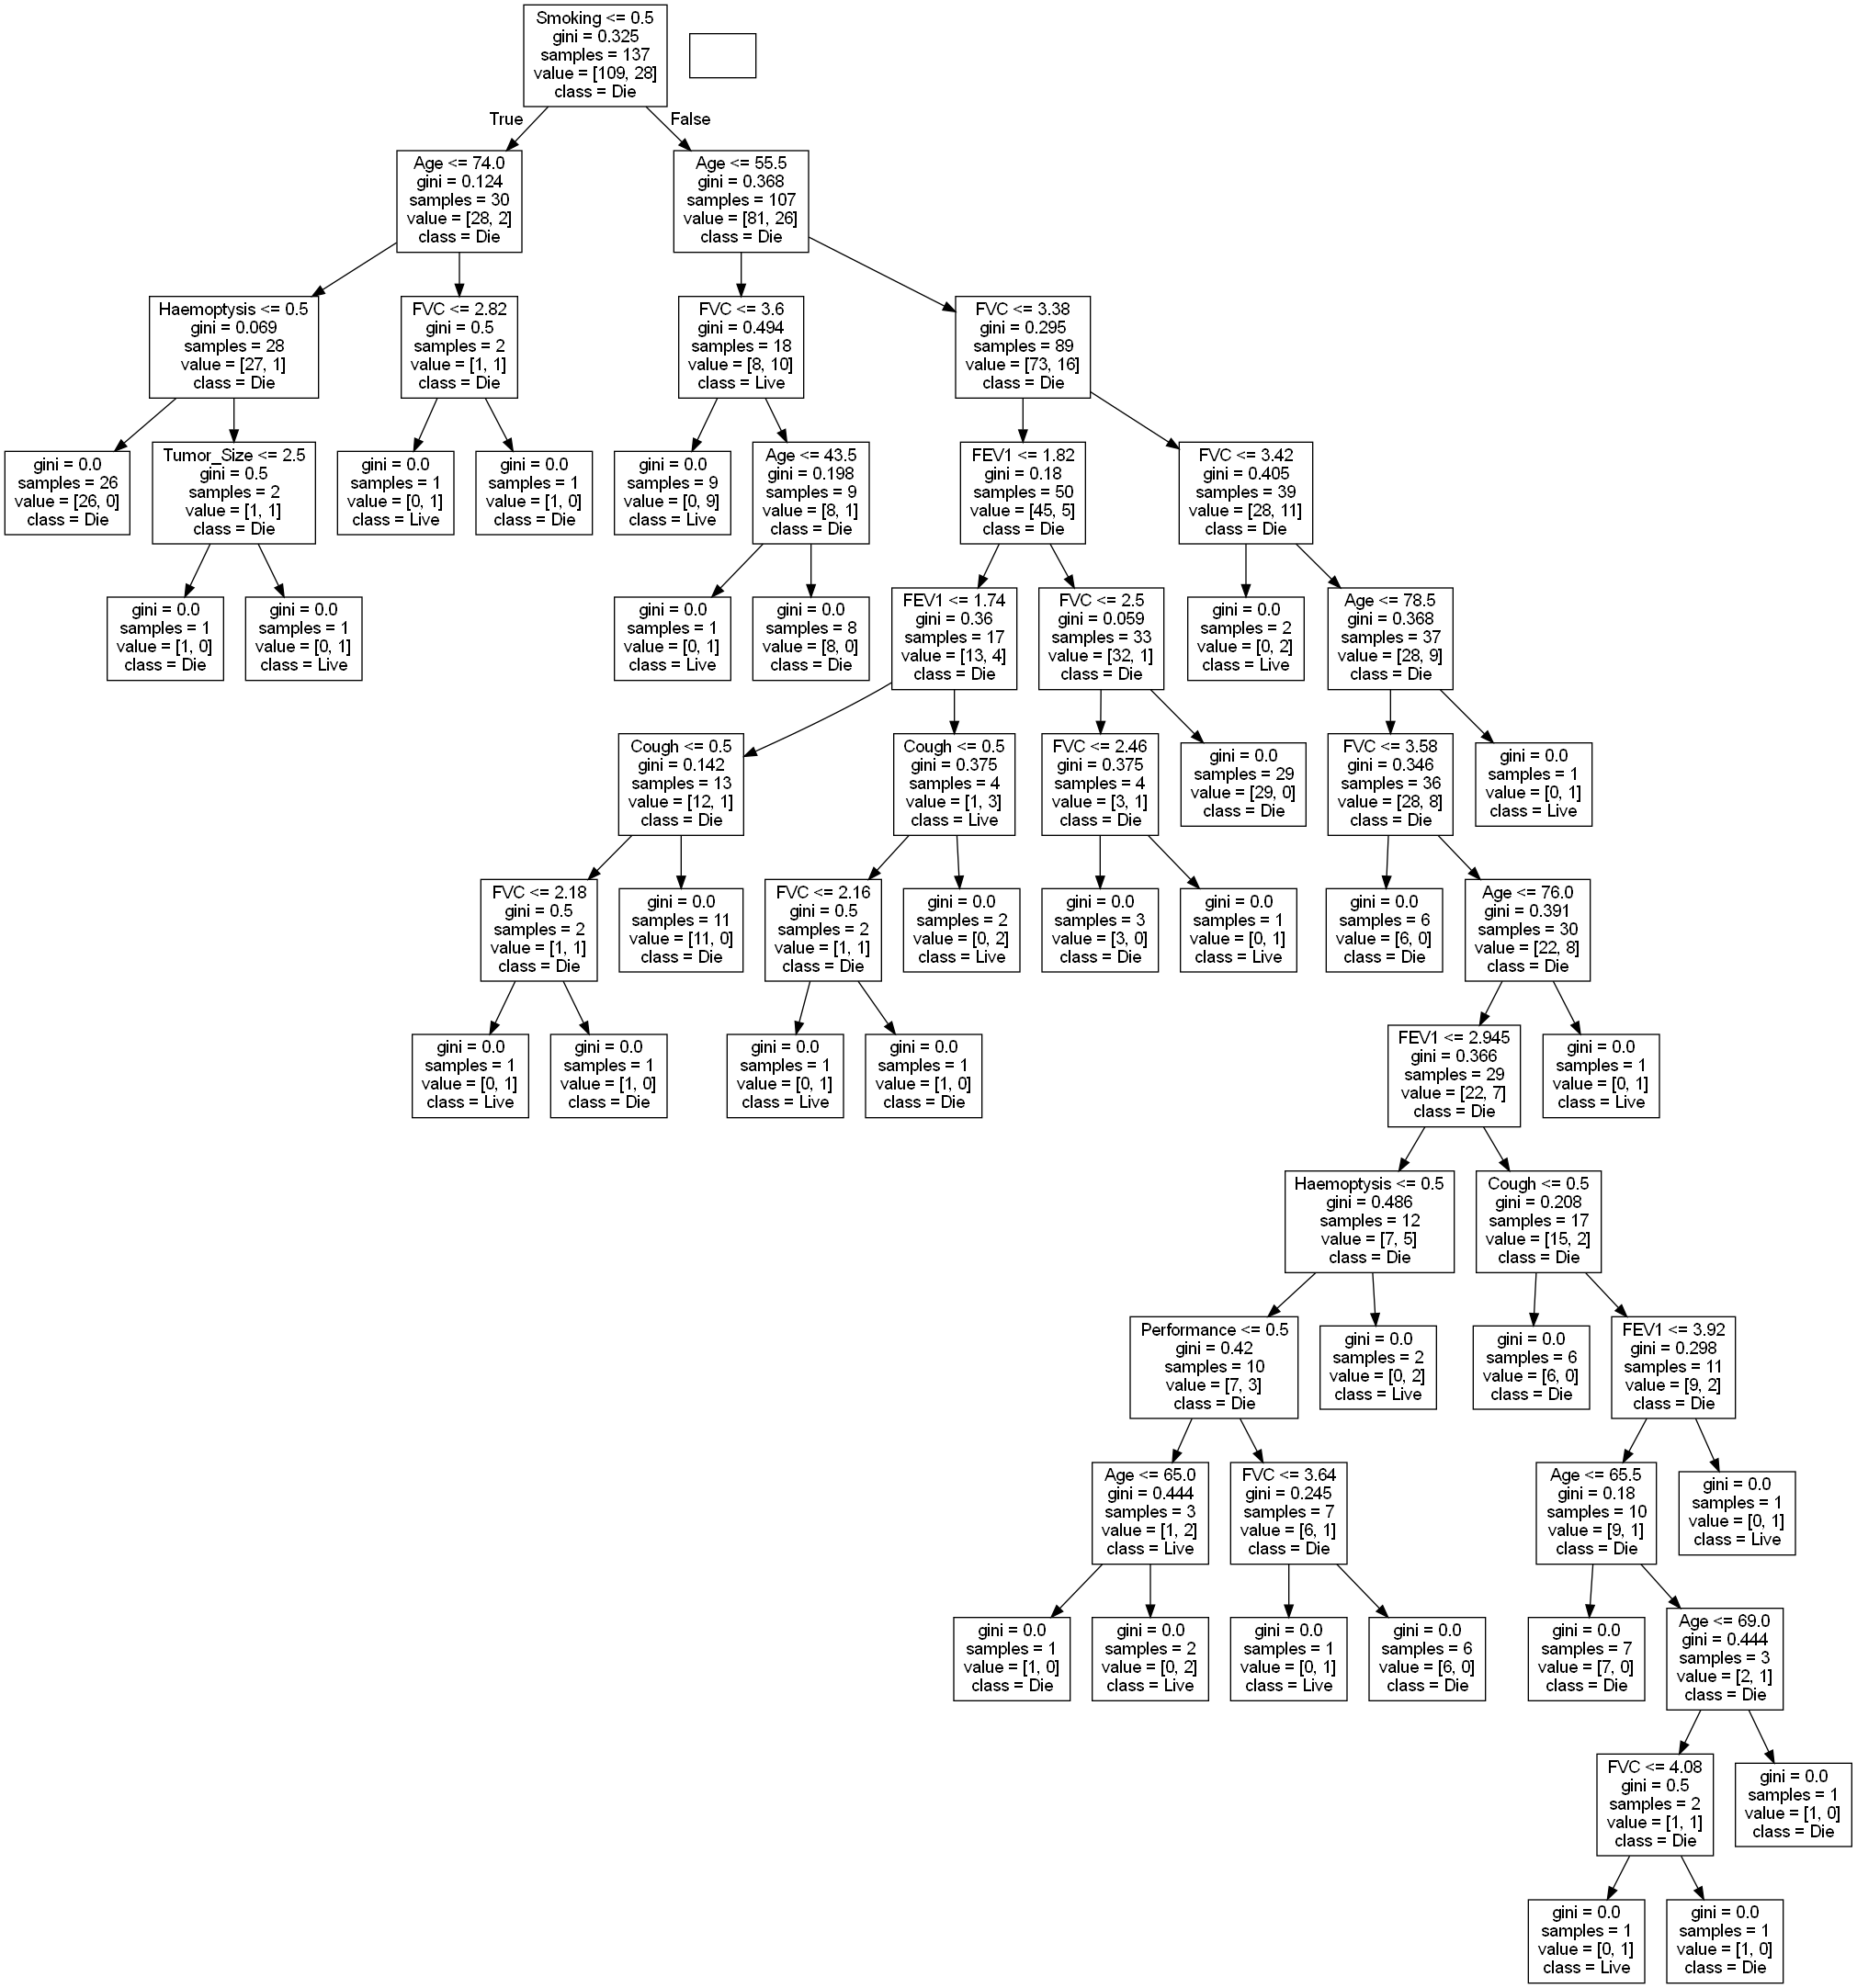

In [218]:
Image(graph.create_png())

In [219]:
# Save the Plot
graph.write_png("hep_decision_tree_plot.png")

True

### Interprete model and evaluate
+ Eli5 
+ Lime
+ SHAP
+ Skater

In [220]:
# Interpreting with Lime
import lime
import lime.lime_tabular

In [221]:
# Methods and attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

### Create Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [222]:
feature_names_best

Index(['Age', 'Asthma', 'Pain', 'Smoking', 'Cough', 'Weakness', 'Performance',
       'Diabetes_Mellitus', 'Haemoptysis', 'Tumor_Size', 'FVC', 'FEV1'],
      dtype='object')

In [223]:
target_names

['Die', 'Live']

In [224]:
class_names = ["Die(1)", "Live(0)"]

In [225]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values, 
                                      feature_names=feature_names_best, 
                                      class_names=class_names, 
                                      discretize_continuous=True)

In [226]:
x1

Age                  54.00
Asthma                0.00
Pain                  0.00
Smoking               1.00
Cough                 1.00
Weakness              0.00
Performance           1.00
Diabetes_Mellitus     0.00
Haemoptysis           0.00
Tumor_Size            2.00
FVC                   4.80
FEV1                  3.41
Name: 216, dtype: float64

In [227]:
x_test_b.iloc[1]

Age                  54.00
Asthma                0.00
Pain                  0.00
Smoking               1.00
Cough                 1.00
Weakness              0.00
Performance           1.00
Diabetes_Mellitus     0.00
Haemoptysis           0.00
Tumor_Size            2.00
FVC                   4.80
FEV1                  3.41
Name: 216, dtype: float64

In [228]:
exp = explainer.explain_instance(x_test_b.iloc[1], knn.predict_proba, num_features=14, top_labels=1)

In [239]:
exp.show_in_notebook(show_table=True, show_all=False)

### Evaluation of Model
+ Confusion Matrix
+ Classification Report
+ Accuracy Score

In [230]:
# Classification report
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test_b)
print(classification_report(y_test_b, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       109
           1       0.33      0.04      0.06        28

    accuracy                           0.79       137
   macro avg       0.57      0.51      0.47       137
weighted avg       0.70      0.79      0.71       137



In [231]:
# Accuracy Score
knn = KNeighborsClassifier()
knn.fit(x_test_b, y_test_b)
knn.score(x_test_b, y_test_b)*100

84.67153284671532